<a href="https://colab.research.google.com/github/misrori/coding2023/blob/main/Session16_to_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AOC 2022 day 5


In [ ]:
import requests
import string

data = requests.get("https://raw.githubusercontent.com/misrori/aoc/2022/day5.txt").text.split('\n')
data.pop()


''

In [ ]:
#use enumerate to get the last row
last_row_index

7

In [ ]:
for i in data:
    if i[1]=='1':
        break
    print(i)



[N]             [R]             [C]
[T] [J]         [S] [J]         [N]
[B] [Z]     [H] [M] [Z]         [D]
[S] [P]     [G] [L] [H] [Z]     [T]
[Q] [D]     [F] [D] [V] [L] [S] [M]
[H] [F] [V] [J] [C] [W] [P] [W] [L]
[G] [S] [H] [Z] [Z] [T] [F] [V] [H]
[R] [H] [Z] [M] [T] [M] [T] [Q] [W]


'[R] [H] [Z] [M] [T] [M] [T] [Q] [W]'

In [ ]:
#get the locations where you find the strings

[R] [H] [Z] [M] [T] [M] [T] [Q] [W]
[G] [S] [H] [Z] [Z] [T] [F] [V] [H]
[H] [F] [V] [J] [C] [W] [P] [W] [L]
[Q] [D]     [F] [D] [V] [L] [S] [M]
[S] [P]     [G] [L] [H] [Z]     [T]
[B] [Z]     [H] [M] [Z]         [D]
[T] [J]         [S] [J]         [N]


[['R', 'H', 'Z', 'M', 'T', 'M', 'T', 'Q', 'W'],
 ['G', 'S', 'H', 'Z', 'Z', 'T', 'F', 'V', 'H'],
 ['H', 'F', 'V', 'J', 'C', 'W', 'P', 'W', 'L'],
 ['Q', 'D', ' ', 'F', 'D', 'V', 'L', 'S', 'M'],
 ['S', 'P', ' ', 'G', 'L', 'H', 'Z', ' ', 'T'],
 ['B', 'Z', ' ', 'H', 'M', 'Z', ' ', ' ', 'D'],
 ['T', 'J', ' ', ' ', 'S', 'J', ' ', ' ', 'N'],
 ['N', ' ', ' ', ' ', 'R', ' ', ' ', ' ', 'C']]

In [ ]:

stacks



[['R', 'G', 'H', 'Q', 'S', 'B', 'T', 'N'],
 ['H', 'S', 'F', 'D', 'P', 'Z', 'J'],
 ['Z', 'H', 'V'],
 ['M', 'Z', 'J', 'F', 'G', 'H'],
 ['T', 'Z', 'C', 'D', 'L', 'M', 'S', 'R'],
 ['M', 'T', 'W', 'V', 'H', 'Z', 'J'],
 ['T', 'F', 'P', 'L', 'Z'],
 ['Q', 'V', 'W', 'S'],
 ['W', 'H', 'L', 'M', 'T', 'D', 'N', 'C']]

Steps

'PTWLTDSJV'

part 2

In [ ]:
x = [2, 3, 5, 6]
y = [7, 8, 9, 10, 12]
amount = 3

print(y[len(y)-amount:])
print(y[:len(y)-amount])

x.extend(y[:len(y)-amount])
print(x)

[9, 10, 12]
[7, 8]
[2, 3, 5, 6, 7, 8]


TW


In [ ]:

from re import A
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import requests
import json


class Tw:
    def __init__(self):

        self.get_all_stock()
        self.get_all_crypto()
        self.get_all_etf()

    def get_all_stock(self):

        data_query = '{"filter":[{"left":"type","operation":"in_range","right":["stock","dr","fund"]},{"left":"subtype","operation":"in_range","right":["common","foreign-issuer","","etf","etf,odd","etf,otc","etf,cfd"]},{"left":"exchange","operation":"in_range","right":["AMEX","NASDAQ","NYSE"]},{"left":"is_primary","operation":"equal","right":true},{"left":"active_symbol","operation":"equal","right":true}],"options":{"lang":"en"},"markets":["america"],"symbols":{"query":{"types":[]},"tickers":[]},"columns":["logoid","name","close","change","change_abs","Recommend.All","volume","Value.Traded","market_cap_basic","price_earnings_ttm","earnings_per_share_basic_ttm","number_of_employees","sector","High.3M","Low.3M","Perf.3M","Perf.5Y","High.1M","Low.1M","High.6M","Low.6M","Perf.6M","beta_1_year","price_52_week_high","price_52_week_low","High.All","Low.All","BB.lower","BB.upper","change|1M","change_abs|1M","change|1W","change_abs|1W","change|240","country","EMA50","EMA100","EMA200","MACD.macd","MACD.signal","Mom","Perf.1M","RSI7","SMA50","SMA100","SMA200","Stoch.RSI.K","Stoch.RSI.D","Perf.W","Perf.Y","Perf.YTD","industry","Perf.All","description","type","subtype","update_mode","pricescale","minmov","fractional","minmove2","Mom[1]","RSI7[1]","Rec.Stoch.RSI","currency","fundamental_currency_code"],"sort":{"sortBy":"market_cap_basic","sortOrder":"desc"},"range":[0,8000]}'
        response = requests.post('https://scanner.tradingview.com/america/scan', data=data_query)
        data = response.json()
        list_elements = list(map(lambda x:x['d'], data['data'] ))
        self.stock = pd.DataFrame(list_elements)
        self.stock.columns = json.loads(data_query)['columns']
        self.stock = self.stock[self.stock['name'].str.contains('\\.')!=True]
        self.stock.reset_index(inplace=True, drop=True)


    def get_all_crypto(self):

        data_query = '{"columns":["base_currency","base_currency_desc","base_currency_logoid","update_mode","type","typespecs","exchange","crypto_total_rank","close","pricescale","minmov","fractional","minmove2","currency","24h_close_change|5","market_cap_calc","fundamental_currency_code","24h_vol_cmc","circulating_supply","crypto_common_categories","crypto_blockchain_ecosystems"],"ignore_unknown_fields":false,"options":{"lang":"en"},"range":[0,300],"sort":{"sortBy":"crypto_total_rank","sortOrder":"asc"},"markets":["coin"]}'
        response = requests.post('https://scanner.tradingview.com/coin/scan', data=data_query)
        data = response.json()
        list_elements = list(map(lambda x:x['d'], data['data'] ))
        self.crypto = pd.DataFrame(list_elements)
        self.crypto.columns = json.loads(data_query)['columns']
        filter = list(map(lambda x: 'stablecoins' not in x, self.crypto['crypto_common_categories'].fillna('-') ))
        self.crypto = self.crypto.loc[filter, ]
        self.crypto['ticker'] = self.crypto['base_currency'] + '-USD'
        self.crypto.reset_index(inplace=True, drop=True)

    def get_all_etf(self):

        data_query = '{"columns":["name","description","logoid","update_mode","type","typespecs","close","pricescale","minmov","fractional","minmove2","currency","change","Value.Traded","relative_volume_10d_calc","aum","fundamental_currency_code","nav_total_return.5Y","expense_ratio","asset_class.tr","focus.tr","nav_discount_premium","category.tr","brand.tr","niche.tr"],"ignore_unknown_fields":false,"options":{"lang":"en"},"price_conversion":{"to_symbol":true},"range":[0,3000],"sort":{"sortBy":"aum","sortOrder":"desc"},"markets":["america"],"filter2":{"operator":"and","operands":[{"operation":{"operator":"or","operands":[{"operation":{"operator":"and","operands":[{"expression":{"left":"typespecs","operation":"has","right":["etn"]}}]}},{"operation":{"operator":"and","operands":[{"expression":{"left":"typespecs","operation":"has","right":["etf"]}}]}}]}}]}}'
        response = requests.post('https://scanner.tradingview.com/america/scan', data=data_query)
        data = response.json()
        list_elements = list(map(lambda x:x['d'], data['data'] ))
        self.etf = pd.DataFrame(list_elements)
        self.etf.columns = json.loads(data_query)['columns']
        self.etf = self.etf[self.etf['name'].str.contains('\\.')!=True]
        self.etf.reset_index(inplace=True, drop=True)


    def moneystring( self, money):
        """
        Convert money to string with unit
        Parameters:
        - money: money to convert
        Return: string with unit
        """
        # Trillion, Billion, Million


        return money_str


    def get_plotly_title_for_stock(self, ticker):


        return(plotly_title)


    def get_sec_plot(self, ticker):
        pass



    def get_ind_plot(self, ticker):
        pass





#tw = Tw()
#print(tw.stock.head(1).T)
#print(tw.crypto.head(1).T)

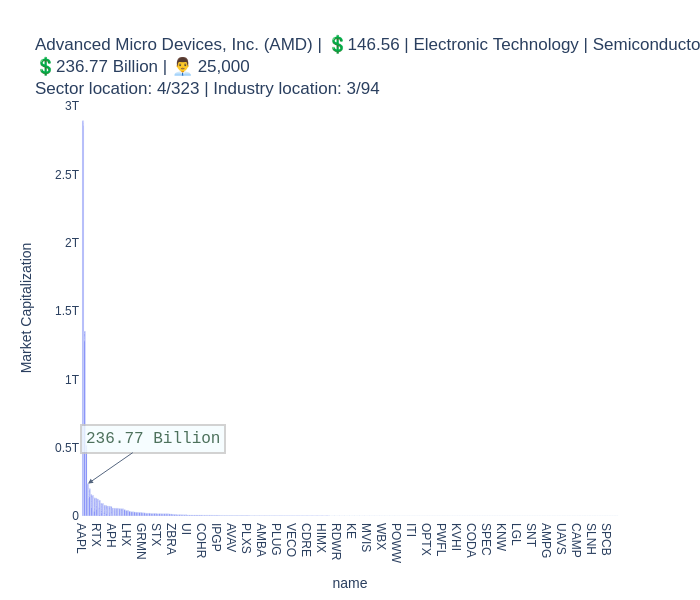

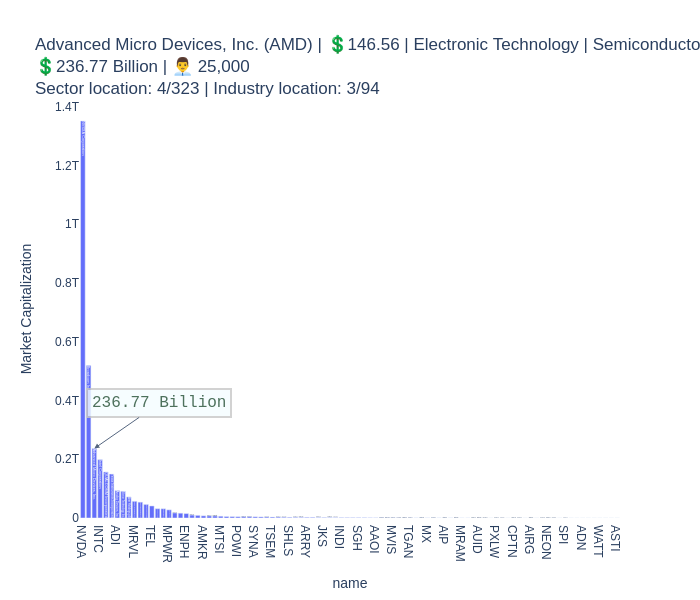